## 사용 라이브러리

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pymysql

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

import tensorflow as tf
from tensorflow import keras #케라스
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Dropout, Concatenate, Input
from sklearn.preprocessing import MinMaxScaler

tf.keras.utils.set_random_seed(42) #seed
tf.config.experimental.enable_op_determinism() #텐서플로 연산 고정

## 데이터 불러오기

In [24]:
### Table : train
conn = pymysql.connect(host='localhost'
                       ,user = 'root'
                       ,password = 'dbdb1021&'
                       ,db='ion'
                       ,charset='utf8'
                       ,cursorclass=pymysql.cursors.DictCursor)
cursor = conn.cursor()

# 4단계 : sql문 작성(데이터 read)
sql = "SELECT * FROM ion.m02_01_train;"

# 5단계 : sql문 실행(데이터 read)
cursor.execute(sql)

# 6단계 : fetch 메서드(조회결과 콘솔창에서 보기 위함)
result = cursor.fetchall() # fetchall() : 전부 가져오기

# 7단계 : 실행 결과 콘솔창에서 출력
# for data in result:
#     print(data)

# 8단계 : commit 및 연결 해제
conn.commit() # 커밋은 반복할 필요 없음
conn.close()

# 9단계 : df
df = pd.DataFrame(result)
df[:5]

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION
0,3283834,01M02,1,9253,10511673,67,1,-0.079428,-0.958814,-0.959509,...,-1.751661,-2.783162,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
1,3283838,01M02,1,9253,10511673,67,1,-0.079419,-0.958928,-0.959651,...,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
2,3283842,01M02,1,9253,10511673,67,1,-0.079409,-0.959156,-0.960006,...,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
3,3283846,01M02,1,9253,10511673,67,1,-0.079420,-0.958928,-0.959297,...,-1.747158,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
4,3283850,01M02,1,9253,10511673,67,1,-0.079430,-0.959269,-0.959438,...,-1.747158,-2.784389,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785


In [25]:
### Table : ttf
conn = pymysql.connect(host='localhost'
                       ,user = 'root'
                       ,password = 'dbdb1021&'
                       ,db='ion'
                       ,charset='utf8'
                       ,cursorclass=pymysql.cursors.DictCursor)
cursor = conn.cursor()

# 4단계 : sql문 작성(데이터 read)
sql = "SELECT * FROM ion.m02_01_ttf;"

# 5단계 : sql문 실행(데이터 read)
cursor.execute(sql)

# 6단계 : fetch 메서드(조회결과 콘솔창에서 보기 위함)
result = cursor.fetchall() # fetchall() : 전부 가져오기

# 7단계 : 실행 결과 콘솔창에서 출력
# for data in result:
#     print(data)

# 8단계 : commit 및 연결 해제
conn.commit() # 커밋은 반복할 필요 없음
conn.close()

# 9단계 : df
df_ttf = pd.DataFrame(result)
df_ttf[:5]

,time,TTF_FlowCool Pressure Dropped Below Limit,TTF_Flowcool Pressure Too High Check Flowcool Pump,TTF_Flowcool leak
0,3283834,623234.0,9146470.0,632514.0
1,3283838,623230.0,9146466.0,632510.0
2,3283842,623226.0,9146462.0,632506.0
3,3283846,623222.0,9146458.0,632502.0
4,3283850,623218.0,9146454.0,632498.0


In [30]:
# temp = df_ttf[(df_ttf['time']>=21047774) & (df_ttf['time']<=21083906)]
# plt.plot(temp['time'], temp['TTF_FlowCool Pressure Dropped Below Limit'])
# plt.plot(temp['time'], temp['TTF_Flowcool Pressure Too High Check Flowcool Pump'])
# plt.plot(temp['time'], temp['TTF_Flowcool leak'])
temp

,time,TTF_FlowCool Pressure Dropped Below Limit,TTF_Flowcool Pressure Too High Check Flowcool Pump,TTF_Flowcool leak
2500544,21047774,1527378.0,857566.0,3978032.0
2500545,21047778,1527374.0,857562.0,3978028.0
2500546,21047782,1527370.0,857558.0,3978024.0
2500547,21047786,1527366.0,857554.0,3978020.0
2500548,21047790,1527362.0,857550.0,3978016.0
...,...,...,...,...
2508559,21083890,1491262.0,821450.0,3941916.0
2508560,21083894,1491258.0,821446.0,3941912.0
2508561,21083898,1491254.0,821442.0,3941908.0
2508562,21083902,1491250.0,821438.0,3941904.0


In [46]:
df_model = pd.concat([df['time'], df.iloc[:, 7:], df_ttf.iloc[:,1]], axis=1)
df_model = df_model.dropna()
df_model

,time,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,ETCHSUPPRESSORCURRENT,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,TTF_FlowCool Pressure Dropped Below Limit
0,3283834,-0.079428,-0.958814,-0.959509,-0.946194,-0.939043,-2.842907,-2.332807,-1.751661,-2.783162,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,623234.0
1,3283838,-0.079419,-0.958928,-0.959651,-0.946103,-0.939043,-2.842907,-2.332807,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,623230.0
2,3283842,-0.079409,-0.959156,-0.960006,-0.946057,-0.939043,-2.841850,-2.332807,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,623226.0
3,3283846,-0.079420,-0.958928,-0.959297,-0.946148,-0.939043,-2.841850,-2.332807,-1.747158,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,623222.0
4,3283850,-0.079430,-0.959269,-0.959438,-0.946057,-0.939043,-2.841850,-2.332807,-1.747158,-2.784389,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,623218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624520,36797136,-0.079442,-0.958814,-0.959226,-0.945873,-0.939043,-2.839887,-2.018013,-1.753413,-2.791223,-0.646442,-0.013207,-0.122437,0.0,0.988432,1.288380,1.530079,-0.604941,16.0
4624521,36797140,-0.079452,-0.958530,-0.959297,-0.946332,-0.939043,-2.839887,-2.029585,-1.742404,-2.791223,-0.646442,-0.013207,-0.122437,0.0,0.988432,1.288380,1.530079,-0.604941,12.0
4624522,36797144,-0.079461,-0.958644,-0.959651,-0.946424,-0.939043,-2.842907,-2.039228,-1.742404,-2.791223,-0.646442,-0.013207,-0.122437,0.0,0.988432,1.288380,1.530079,-0.604941,8.0
4624523,36797148,-0.079461,-0.958644,-0.959438,-0.946424,-0.939043,-2.842907,-2.053372,-1.747158,-2.789997,-0.646442,-0.013207,-0.122437,0.0,0.988432,1.288380,1.530079,-0.604941,4.0


In [ ]:
# RUL이 0이되는 주기
hap = 0
for i in df_model.iloc[:,-1]:
    if i == 0:
        print(hap)
        hap = 0
    hap += 1

131031
13039
2012
481
669865
5900
489
112
422
1380198
442303
47392
133923
66772
21431
85216
1499571
41960
11533
1151
53816
14122
1778


In [ ]:
# 0이되는 주기 확인
df2 = df_model.copy()

idx_0 = [-1] + list(df2[df2['TTF_FlowCool Pressure Dropped Below Limit'] == 0].index)[:-1] #x2
idx_1 = list(df2[df2['TTF_FlowCool Pressure Dropped Below Limit'] == 0].index) #x1
idx_n = [df.iloc[0,-1]] + list(df2.loc[idx,'TTF_FlowCool Pressure Dropped Below Limit']) #y값
a = []
b = []

for val0, val1 in zip(idx_0, idx_1):
    a.append(val0+1)
    b.append(val1)

df2['m'] = 0

for i in range(len(idx_n)):
    df2['m'][a[i]:b[i]+1] = idx_n[i]/(b[i]-a[i])
    
np.column_stack([a,b])

# 회귀모델

In [74]:
# train-ttf 파일 합치기
# df_model = pd.concat([df['time'], df.iloc[:, 7:], df_ttf.iloc[:,1]], axis=1)
# df_model = df_model.dropna()

# 종속 변수 (RUL) 설정
y = df_model.iloc[:,-1]

# 독립 변수 (Sensor1, Sensor2, Time) 설정
X = df_model.iloc[:,:-1]

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 테스트 데이터로 RUL 예측
y_pred = model.predict(X_test)

# 모델 평가 (평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(model.score(X_train, y_train))

Mean Squared Error: 3890495091621.6514
0.24968833019476833


In [75]:
# 종속 변수 (RUL) 설정
y = df_model.iloc[:,-1]

# 독립 변수 (Sensor1, Sensor2, Time) 설정
X = df_model.iloc[:,:-1]

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성
from sklearn.linear_model import Ridge
r = Ridge()

# 모델 훈련
r.fit(X_train, y_train)

# 테스트 데이터로 RUL 예측
y_pred = r.predict(X_test)

# 모델 평가 (평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(r.score(X_train, y_train))

c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.22909e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Mean Squared Error: 3890494855331.638
0.24968802064426476


c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.59951e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.59954e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.59977e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\USER\anaconda3\envs\nltk\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.60214e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


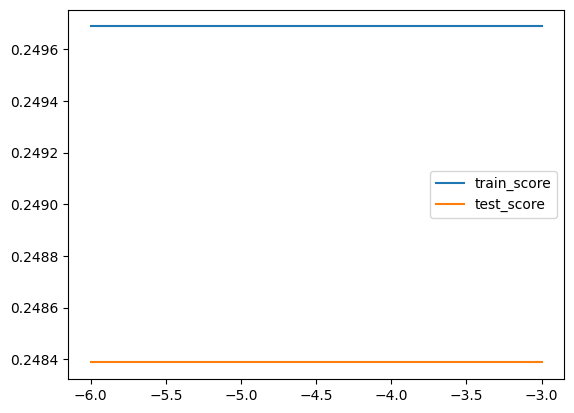

In [80]:
### 규제강도
alpha_lis = [0.000001, 0.00001, 0.0001, 0.001]

# 훈련 및 테스트 정확도를 담을 변수 생성
train_score = []
test_score = []

for alpha in alpha_lis:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    train_score.append(ridge.score(X_train, y_train))
    test_score.append(ridge.score(X_test, y_test))

# 시각화
plt.plot(np.log10(alpha_lis), train_score, label='train_score')
plt.plot(np.log10(alpha_lis), test_score, label='test_score')
plt.legend()

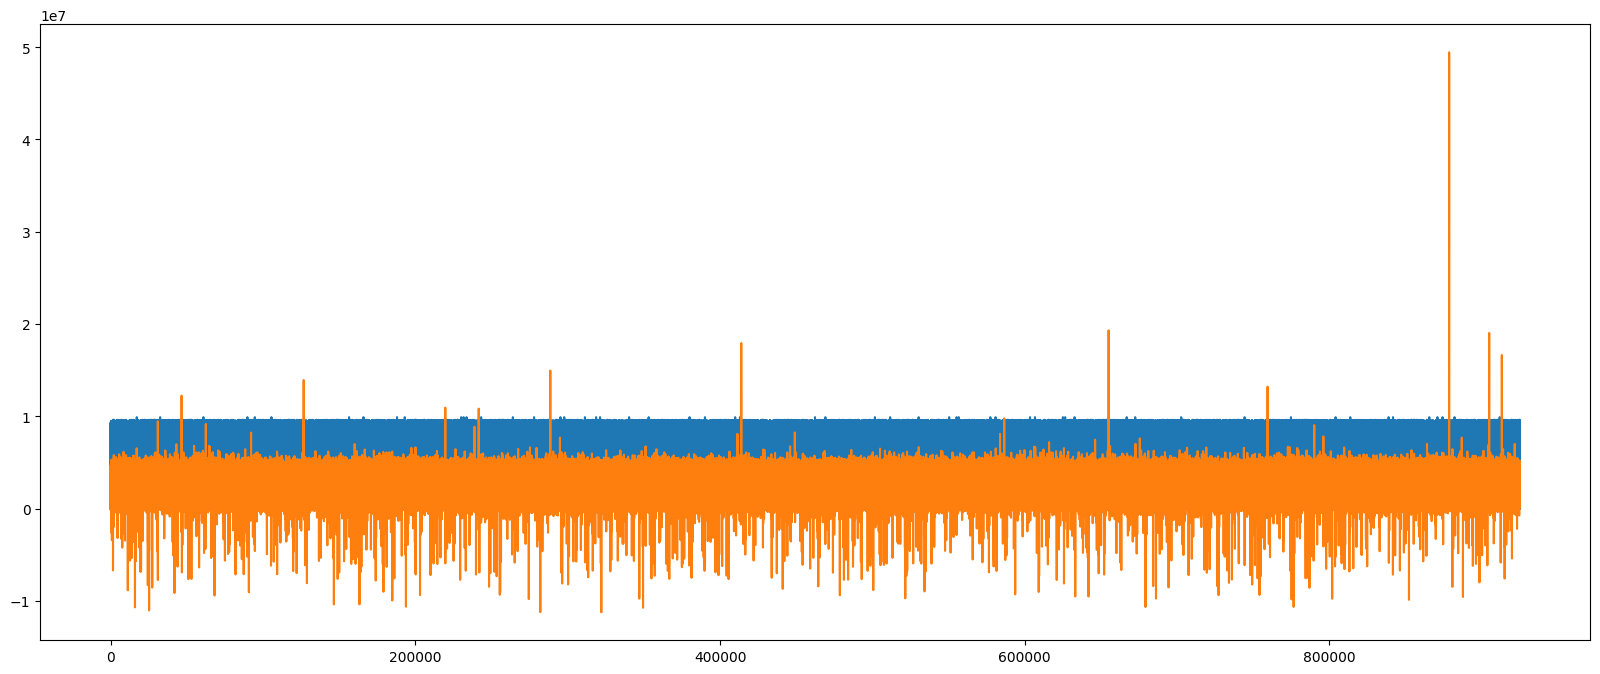

In [81]:
plt.figure(figsize=(20,8))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_pred)), y_pred)

# 딥러닝

In [6]:
# 종속 변수 (RUL) 설정
y = df_model.iloc[:,-1]

# 독립 변수 (Sensor1, Sensor2, Time) 설정
X = df_model.iloc[:,:-1]

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(18, 1)))
model.add(Dense(1))
adam = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=adam, loss='mse', metrics='accuracy')

# 훈련
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_LSTM_model.h5')
earlystop_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train,
         epochs=500,
         batch_size=64,
         verbose=1,
         validation_data=(X_test, y_test)
         callbacks=[checkpoint_cb, earlystop_cb])

# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")
# print(f"Model Score: {model.evaluate(X_test, y_test)}")

------

In [23]:
# RUL이 0이되는 주기
hap = 0
for i in temp.iloc[:,-1]:
    if i == 0:
        print(hap)
        hap = 0
    hap += 1

131231
13043
2014
481
671389
5974
489
112
422
1384494
444299
47812
134267
66856
21439
85220
1504135
42180
11555
1151
54042
14182
1778


In [22]:
temp = df_model.sort_values(by='time')

In [47]:
# 131031 + 13039 + 2012 + 481
df_model2 = df_model.iloc[:146564,:]
plt.plot(df_model2['time'], df_model2['TTF_FlowCool Pressure Dropped Below Limit'])

In [8]:
# 종속 변수 (RUL) 설정
y = df_model2.iloc[:,-1]

# 독립 변수 설정
X = df_model2.iloc[:,:-1]

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 테스트 데이터로 RUL 예측
y_pred = model.predict(X_test)

# 모델 평가 (평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(model.score(X_train, y_train))

Mean Squared Error: 54832462.329723135
0.9986289586254155


In [19]:
# 릿지 회귀 모델 생성
r = Ridge()

# 모델 훈련
r.fit(X_train, y_train)

# 테스트 데이터로 RUL 예측
y_pred = r.predict(X_test)

# 모델 평가 (평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(r.score(X_train, y_train))

Mean Squared Error: 81275100.36748728
0.9979764699704551


In [23]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(18, 1)))
model.add(Dense(50))
model.add(Dense(1))
adam = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=adam, loss='mse', metrics='accuracy')

# 훈련
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_LSTM_model.h5')
earlystop_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train,
         epochs=1500,
         batch_size=64,
         verbose=1,
         validation_data=(X_test, y_test),
         callbacks=[checkpoint_cb, earlystop_cb])

Epoch 1/500
1833/1833 [==============================] - 14s 7ms/step - loss: 64682082304.0000 - accuracy: 0.0000e+00 - val_loss: 45418590208.0000 - val_accuracy: 0.0000e+00
Epoch 2/500
1833/1833 [==============================] - 13s 7ms/step - loss: 45590048768.0000 - accuracy: 0.0000e+00 - val_loss: 45578633216.0000 - val_accuracy: 0.0000e+00
Epoch 3/500
1833/1833 [==============================] - 13s 7ms/step - loss: 47387086848.0000 - accuracy: 0.0000e+00 - val_loss: 45649981440.0000 - val_accuracy: 0.0000e+00
Epoch 4/500
1833/1833 [==============================] - 13s 7ms/step - loss: 45582491648.0000 - accuracy: 0.0000e+00 - val_loss: 45484982272.0000 - val_accuracy: 0.0000e+00


In [24]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Score: {model.evaluate(X_test, y_test)}")

Mean Squared Error: 45418566735.64525
917/917 [==============================] - 2s 2ms/step - loss: 45418577920.0000 - accuracy: 0.0000e+00
Model Score: [45418577920.0, 0.0]


In [ ]:
# 실험할 타임스텝 값들(117243, 10, 18)
timesteps_to_try = [50, 80]

# 각 타임스텝에 대한 결과 저장
results = []

# 훈련
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_LSTM_model.h5')
earlystop_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
adam = keras.optimizers.Adam(learning_rate=1e-5)

for timesteps in timesteps_to_try:
    # 데이터 전처리
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(df_model2)
    
    # 데이터를 타임스텝에 맞게 분할
    X = []
    y = []
    for i in range(len(data_scaled) - timesteps):
        X.append(data_scaled[i:i+timesteps, :-1])
        y.append(data_scaled[i+timesteps, -1])
    X = np.array(X)
    y = np.array(y)
    
    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # LSTM 모델 생성
    model = Sequential()
    model.add(GRU(100, activation='relu', input_shape=(timesteps, 18, 1)))
    model.add(Dense(50))
    model.add(Dense(1))
    model.compile(optimizer=adam, loss='mse', metrics='accuracy')

    history = model.fit(X_train, y_train,
            epochs=500,
            batch_size=64,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[checkpoint_cb, earlystop_cb])
    # 모델 평가
    y_pred = model.predict(X_test)
    
    try:
        mse = mean_squared_error(y_test, y_pred)
    except:
        mse = np.nan
    results.append({'timesteps': timesteps, 'mse': mse, 'accuracy':history.history['accuracy'][-1]})

# 결과 출력
for result in results:
    print(f"Time Steps: {result['timesteps']}, Mean Squared Error: {result['mse']:.7f}, accuracy: {result['accuracy']:.7f}")

In [18]:

# 결과 출력
for result in results:
    print(f"Time Steps: {result['timesteps']}, Mean Squared Error: {result['mse']:.7f}, accuracy: {result['accuracy']:.7f}")

Time Steps: 50, Mean Squared Error: 0.0000102, accuracy: 0.0000341


In [ ]:
# 실험할 타임스텝 값들(117243, 10, 18)
timesteps = 50

# 각 타임스텝에 대한 결과 저장
results = []

# 훈련
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_LSTM_model.h5')
earlystop_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
adam = keras.optimizers.Adam(learning_rate=1e-5)

# 데이터 전처리
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_model2)

# 데이터를 타임스텝에 맞게 분할
X = []
y = []
for i in range(len(data_scaled) - timesteps):
    X.append(data_scaled[i:i+timesteps, :-1])
    y.append(data_scaled[i+timesteps, -1])
X = np.array(X)
y = np.array(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM 모델 생성
model = Sequential()
model.add(GRU(200, activation='relu', input_shape=(timesteps, 18)))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))
model.compile(optimizer=adam, loss='mse', metrics='accuracy')

history = model.fit(X_train, y_train,
        epochs=200,
        batch_size=64,
        verbose=1,
        validation_data=(X_test, y_test),
        callbacks=[checkpoint_cb, earlystop_cb])
# 모델 평가
y_pred = model.predict(X_test)

try:
    mse = mean_squared_error(y_test, y_pred)
except:
    mse = np.nan

# 결과 출력
for result in results:
    print(f"Time Steps: {timesteps}, Mean Squared Error: {mse:.7f}, accuracy: {history.history['accuracy'][-1]:.7f}")